# Fast AI
Fastai primarily focuses on high-level tasks and doesn't directly support object detection out of the box. For object detection, you might typically use a library like Detectron2 or YOLO, but you can work on a workaround by treating object detection as an image classification problem where each class is a combination of an object and its position.

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
from fastbook import *

## Vision: Segmentation Task

epoch,train_loss,valid_loss,time
0,3.254988,2.597045,01:17


epoch,train_loss,valid_loss,time
0,2.138157,1.859445,01:24
1,1.756930,1.722367,01:23
2,1.601804,1.256694,01:31
3,1.420625,1.069894,01:24
4,1.255978,0.939962,01:22
5,1.120215,0.912146,01:23
6,1.013367,0.869819,01:22
7,0.930249,0.856096,01:24


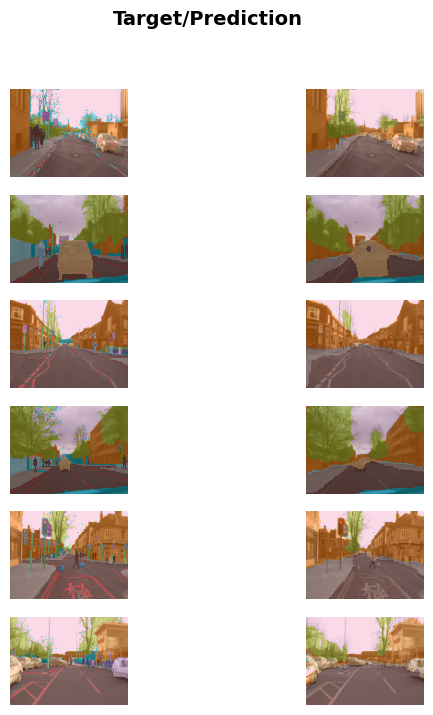

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)
learn.show_results(max_n=6, figsize=(7,8))


## Tabular Task

In [5]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)


epoch,train_loss,valid_loss,accuracy,time
0,0.387730,0.381792,0.824939,00:05
1,0.366049,0.356760,0.837070,00:06
2,0.351621,0.352614,0.835074,00:05


## Recommendation Task

In [6]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)
learn.show_results()


epoch,train_loss,valid_loss,time
0,1.497477,1.499363,00:00


epoch,train_loss,valid_loss,time
0,1.359738,1.435555,00:00
1,1.248491,1.241086,00:00
2,1.011032,0.909329,00:00
3,0.792002,0.753744,00:00
4,0.686055,0.713194,00:01
5,0.651679,0.700792,00:01
6,0.619634,0.696061,00:00
7,0.616622,0.694307,00:00
8,0.609485,0.693532,00:00
9,0.599112,0.693340,00:00


,userId,movieId,rating,rating_pred
0,17.0,43.0,5.0,3.718074
1,17.0,86.0,5.0,4.207943
2,18.0,57.0,4.0,3.932970
3,21.0,46.0,3.0,3.013128
4,11.0,87.0,3.0,3.261971
5,74.0,4.0,4.0,3.675428
6,48.0,22.0,4.0,3.862434
7,19.0,57.0,5.0,4.326548
8,45.0,56.0,5.0,3.697703
